<img src="http://cocl.us/neural_network_example" alt="Neural Network Example" width=600px>
<img src="http://cocl.us/general_neural_network" alt="Neural Network General" width=600px>

# Week 1

AttributeError: 'Node' object has no attribute 'a_value'

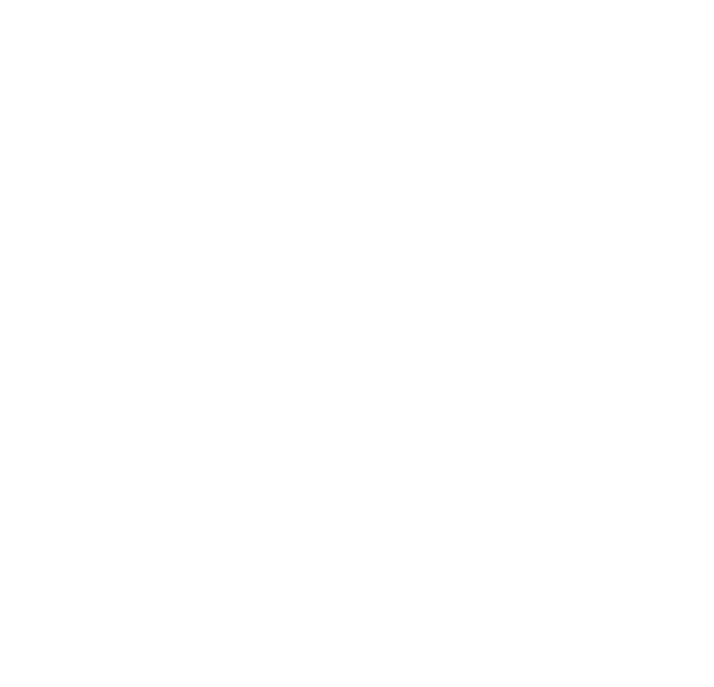

In [207]:
import numpy as np
from matplotlib import pyplot as plt
class Node():

    def __init__(self,layer,name,weights,bias):
        
        #Which layer is this node in
        self.layer = layer
        
        #An integer name
        self.name = name
        
        #Weights should be an array of the size of the previous input layer
        self.weights = weights
        
        ##Define Bias
        self.bias = bias
        
        ##Valuse
        self.value = np.zeros(1)

        
    def set_node_value(self,z):
        self.value = np.array(z)
        
    def __str__(self):
        return " {} {} {} {}" .format(self.layer, self.name,self.weights,self.bias)


class Layer():

    def __init__(self,name,num_nodes,previous,outlayer=False,bias=True):
        #Name of the layer
        self.name = name
        
        #How many nodes are in this layer
        self.num_nodes = num_nodes
        
        #How many nodes in the next layer
        self.previous_nodes = previous
        
        #Store a dictionary object of nodes
        self.nodes = {}
        for i in range(0,self.num_nodes):
            #Node takes in layer name, the ith number associated and an array of previous nodes.
            if bias:
                biases = np.around(np.random.uniform(size=1),decimals=2)
            else:
                biases = np.zeros(1)
                
            self.nodes[i] = Node(self.name,
                                 i,
                                 np.around(
                                    np.random.uniform(size=self.previous_nodes), decimals=2),
                                    biases)
            
    def set_layer_by_array(self,X):
        ##X - [1,2,3] will set nodes0,1,2 to [1,2,3]
        assert(len(X) == len(self.nodes))
        for x in range(0,len(X)):
            self.nodes[x].set_node_value(np.array(X[x]))
            
        
    def __getitem__(self,x):
        return self.nodes[x]

    def __iter__(self):
        for node in self.nodes:
            yield self.nodes[node]
            
    def __len__(self):
        return len(self.nodes)
        
        

class ANNNetwork():
    
    def __init__(self,topology=[]):
        
        #This will define our network topology
        self.topology = {}
        
        #This will define our network.
        self.network = {}

    def set_layer_topology(self,topology):
        self.topology = {k:v for k,v in enumerate(topology,start=0)}
        self.setup_layers()

    def setup_layers(self):
        for layer in self.topology:
            if layer == 0:
                ##Input Layer
                
                ##Input Layer so no previous nodes1
                previous_nodes = 0
                #Layer takes in name, num nodes, and the number of nodes in previous layer
                self.network[layer] = Layer(
                    'Input',
                    self.topology[layer],previous_nodes,bias=False)
                continue
            elif layer == len(self.topology)-1:
                ##Output Layer
                
                ##Previous nodes
                previous_nodes = self.topology[layer-1]
                
                self.network[layer] = Layer('Output', self.topology[layer],previous_nodes,bias=False)
                continue
            
            ##We are in a hidden layer
            previous_nodes = self.topology[layer-1]
            name_ = 'Hiden_{}'.format(layer-1)
            self.network[layer]= Layer(name_,self.topology[layer],previous_nodes)
                    
                
    def set_input(self,X):
        
        if len(X) != len(self.network[0]):
            raise Exception("Must input {} values for input".format(len(self.network[0])))
        else:
            X = np.asarray(X)
            self.network[0].set_layer_by_array(X)
        
            
    def __getitem__(self,x):
        
        return self.network[x]
    
    def __repr__(self):
       return self.network.__repr__()
            
    def __str__(self):
        rep_str = ""
        for layer in self.network:
            rep_str += "Layer {}: Name - {}\n".format(layer,self.network[layer].name)
            for node in self.network[layer]:
               rep_str+="\tNode -{}\n\t\tWeights - {}\n\t\tBias - {}\n\t\tValue - {}\n".format(
                   node.name,
                   node.weights,
                   node.bias,
                   node.value)
        return rep_str
    
    def sigmoid_function(self,value):
        return np.around(1/(1+np.exp(-value)),decimals=3)
    
    def forward_propogate(self):
        '''
        Forward propogate all values
        
        ex. Hidden layer node 1 value will be all the previous input nodes [X1,X2..XN]
        
        and times them by all the weights of the nodes [W1,W2..WN]
        
        (X1*W1 + X2*W2 ... XN+WN)+Bias
        
        Since all the weights of the nodes are the same size as the number of inputs they should be the same
        
        
        '''
        for layer in list(self.network.keys())[1:]:
            ##Start in the hidden layers
            for node in self.network[layer]:
                #Go through all nodes
                X = []
                #Take in the previous_layer_input
                #Look at all the values and put them in an array
                for previous_layer_node in self.network[layer-1]:
                    X.append(previous_layer_node.value)
                X = np.asanyarray(X)
                ##Weights is also an ordered array
                weights = node.weights
                ##Value is their dot product
                value = self.sigmoid_function(
                    np.around(np.sum(X*weights)+node.bias,decimals=2))
                node.set_node_value(value)
                
                
    def fast_forward_propagation(self):
        '''Forward propogation with simple matrix multiplication'''
        ###Fast forward propagation
        
        ##1,N vector of inputs
        X=self.get_inputs()
        
        #go through layers and grab weights
        for layer in list(self.network.keys())[1:]:
            w = self.get_weights_by_layer(layer)
            b = self.get_bias_by_layer(layer)
            z = np.dot(w,X)+b
            a = self.sigmoid_function(z)
            self.network[layer].set_layer_by_array(a)
            X = a
            

            #output
            #z3 = np.dot(w3,z2)

                
    def draw_neural_net(self):
        '''plotting function for AN'''
        left=0.1
        right=0.91
        bottom=0.1
        top=0.91
        fig = plt.figure(figsize=(12, 12))
        ax = fig.gca()
        ax.axis('off')
        layer_sizes = list(self.topology.values())
        n_layers = len(layer_sizes)
        v_spacing = (top - bottom)/float(max(layer_sizes))
        h_spacing = (right - left)/float(len(layer_sizes) - 1)
        # Nodes
        for n, layer_size in enumerate(layer_sizes):
            layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
            for m in range(layer_size):
                value = float(np.around(Ann[n][m].a_value,decimals=2))
                circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                    color='w', ec='k', zorder=4)
                ax.add_artist(circle)
                label = ax.annotate(
                    value, xy=(n*h_spacing + left, layer_top - m*v_spacing), fontsize=12, ha="center",zorder=5)


        # Edges
        for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
            for m in range(layer_size_a):
                for o in range(layer_size_b):
                    line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                      [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                    ax.add_artist(line)
        return ax
    
    def get_inputs(self):
       return np.array([[node.value] for node in self.network[0]])


    def get_weights_by_layer(self,layer):
        return np.array([node.weights for node in self.network[layer]])
    
    def get_bias_by_layer(self,layer):
        return np.array([node.bias for node in self.network[layer]])

 

if __name__ == "__main__":
    Ann = ANNNetwork()
    Ann.set_layer_topology([5,5,5,1])
    Ann.set_input(np.random.uniform(size=5))
    Ann.draw_neural_net()

# # Test training backprop algorithm
# seed(1)
# dataset = [[2.7810836,2.550537003,0],
#     [1.465489372,2.362125076,0],
#     [3.396561688,4.400293529,0],
#     [1.38807019,1.850220317,0],
#     [3.06407232,3.005305973,0],
#     [7.627531214,2.759262235,1],
#     [5.332441248,2.088626775,1],
#     [6.922596716,1.77106367,1],
#     [8.675418651,-0.242068655,1],
#     [7.673756466,3.508563011,1]]
# n_inputs = len(dataset[0]) - 1
# n_outputs = len(set([row[-1] for row in dataset]))
# network = initialize_network(n_inputs, 2, n_outputs)
# train_network(network, dataset, 0.5, 20, n_outputs)
# for layer in network:
#     print(layer)


In [2]:
%%timeit -n 1000 -r 3
from random import seed
seed(3)
Ann = ANNNetwork()
Ann.set_layer_topology([10,16,16,26])
Ann.set_input(np.random.uniform(size=10))
Ann.fast_forward_propagation()

983 µs ± 22.2 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [3]:
%%timeit -n 1000 -r 3
from random import seed
seed(3)
Ann = ANNNetwork()
Ann.set_layer_topology([10,16,16,26])
Ann.set_input(np.random.uniform(size=10))
Ann.forward_propogate()

2.68 ms ± 95.5 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


# Week 2 Add BackPropogation

via Coding Trains awesome series on coding an Ann crom scratch

[The Nature of Code By the Coding Train ](https://natureofcode.com/book/chapter-10-neural-networks/)

He has an entire playlist on Neural Networks:

[Chapter 10 Playlist](https://www.youtube.com/watch?v=XJ7HLz9VYz0&list=PLRqwX-V7Uu6aCibgK1PTWWu9by6XFdCfh)

## Propogate Error

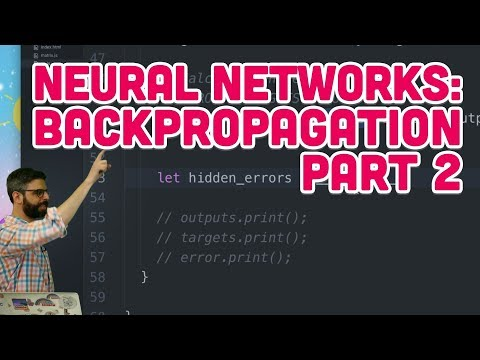

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('r2-P1Fi1g60',width=800,height=600)

In [350]:
%%writefile TrainAnn.py
import random
import numpy as np
import random
from matplotlib import pyplot as plt


np.random.seed(1)

class Node():

    def __init__(self,layer,name,weights,bias):
        
        #Which layer is this node in
        self.layer = layer
        
        #An integer name
        self.name = name
        
        #Notation Name
        if self.layer == 'Input':
            self.not_name = r'$x_{}$'.format(self.name)
            
        elif 'Hiden' in self.layer:
            self.not_name = r'$h_{}$'.format(self.name)
        
        else:
            self.not_name = r'$y_{}$'.format(self.name)
    
        
        #Weights should be an array of the size of the previous input layer
        self.weights = weights
        
        self.weights_annotations = [r"$w_{}$".format(x)+r"$_{}$".format(self.name) for x in range(1,len(self.weights)+1)]
        
        ##Define Bias
        self.bias = bias
        
        ##raw_value
        self.z_value = np.zeros(1)
        
        ##Activation value
        self.a_value = np.zeros(1)
        
        '''
        Error  - This will hold the weighted Error:
        
        If this is an output node, the error will just be the target minus the output.
        '''
        self.error = np.zeros(1)
        
    def set_node_z_value(self,z):
        self.z_value = z
        
    def set_node_a_value(self,a):
        self.a_value = a
        
    def set_error(self,value):
        self.error = value
        
    def update_weights(self,X):
        self.weights = X
        
    def update_bias(self,b):
        self.bias = b
        
    def __str__(self):
        return " Layer-{} Name-{} Weights-{} Bias-{} Notation-{} Error-{}" .format(
            self.layer, self.name,self.weights,self.bias,self.not_name,self.error)
    
    def __repr__(self):
        return self.__str__()


class Layer():

    def __init__(self,name,num_nodes,previous,outlayer=False,bias=True):
        #Name of the layer
        self.name = name
        
        #How many nodes are in this layer
        self.num_nodes = num_nodes
        
        #How many nodes in the next layer
        self.previous_nodes = previous
        
        #Store a dictionary object of nodes
        self.nodes = {}
        for i in range(0,self.num_nodes):
            #Node takes in layer name, the ith number associated and an array of previous nodes.
            if bias:
                biases = np.around(np.random.uniform(size=1),decimals=2)
            else:
                biases = np.zeros(1)
                
            self.nodes[i] = Node(self.name,
                                 i,
                                 np.around(
                                    np.random.uniform(size=self.previous_nodes), decimals=2),
                                    biases)
            
    def set_layer_by_array(self,X,z=False):
        ##X - [1,2,3] will set nodes0,1,2 to [1,2,3]
        assert(len(X) == len(self.nodes))
        if not z:
            for x in range(0,len(X)):
                self.nodes[x].set_node_a_value(np.array(X[x]))
        else:
            for x in range(0,len(X)):
                self.nodes[x].set_node_z_value(np.array(X[x]))
            
            
    def set_layer_error_by_array(self,X):
        ##X - [1,2,3] will set nodes0,1,2 to [1,2,3]
        assert(len(X) == len(self.nodes))
        for x in range(0,len(X)):
            self.nodes[x].set_error(np.array(X[x]))  
    
    def update_weights_by_array(self,X,B):
        for row in range(0,len(X)):           
            self.nodes[row].update_weights(X[row])
            self.nodes[row].update_bias(B[row])
        
    def __getitem__(self,x):
        return self.nodes[x]

    def __iter__(self):
        for node in self.nodes:
            yield self.nodes[node]
            
    def __len__(self):
        return len(self.nodes)
    
    def __repr__(self):
         return self.nodes.__repr__()
        
class ANNetwork():
    
    def __init__(self,topology=[]):
        
        #This will define our network topology
        self.topology = {}
        
        #This will define our network.
        self.network = {}

    def set_layer_topology(self,topology):
        self.topology = {k:v for k,v in enumerate(topology,start=0)}
        self.setup_layers()

    def setup_layers(self):
        for layer in self.topology:
            if layer == 0:
                ##Input Layer
                
                ##Input Layer so no previous nodes1
                previous_nodes = 0
                #Layer takes in name, num nodes, and the number of nodes in previous layer
                self.network[layer] = Layer(
                    'Input',
                    self.topology[layer],
                    previous_nodes,bias=False)
                continue
            elif layer == len(self.topology)-1:
                ##Output Layer
                
                ##Previous nodes
                previous_nodes = self.topology[layer-1]
                
                self.network[layer] = Layer('Output', self.topology[layer],previous_nodes,bias=False)
                continue
            
            ##We are in a hidden layer
            previous_nodes = self.topology[layer-1]
            name_ = 'Hiden_{}'.format(layer-1)
            self.network[layer]= Layer(name_,self.topology[layer],previous_nodes)
                
    def set_input(self,X):
        
        if len(X) != len(self.network[0]):
            raise Exception("Must input {} values for input".format(len(self.network[0])))
        else:
            X = np.asarray(X)
            self.network[0].set_layer_by_array(X)
            
    def __getitem__(self,x):
        return self.network[x]
    
    def __repr__(self):
        return self.network.__repr__()
            
    def __str__(self):
        rep_str = ""
        for layer in self.network:
            rep_str += "Layer {}: Name - {}\n".format(layer,self.network[layer].name)
            for node in self.network[layer]:
               rep_str+="\tNode -{}\n\t\tWeights - {}\n\t\tBias - {}\n\t\tValue - {}\n".format(
                   node.name,
                   node.weights,
                   node.bias,
                   node.value)
        return rep_str
    
    def __len__(self):
        return len(self.network)-1
    
    def sigmoid_function(self,value):
        return np.around(1/(1+np.exp(-value)),decimals=3)
    
    def sigmoid_prime(self,O):
        '''This assumes O has already been passed through sigmoid function: or else it would be 
        Sigmoid(x) * (1-Sigmoid(x))
        
        '''
        return O *(1-O)
    
    def forward_propogate(self):
        '''
        Forward propogate all values
        
        ex. Hidden layer node 1 value will be all the previous input nodes [X1,X2..XN]
        
        and times them by all the weights of the nodes [W1,W2..WN]
        
        (X1*W1 + X2*W2 ... XN+WN)+Bias
        
        Since all the weights of the nodes are the same size as the number of inputs they should be the same
        
        
        '''
        for layer in list(self.network.keys())[1:]:
            ##Start in the hidden layers
            for node in self.network[layer]:
                #Go through all nodes
                X = []
                #Take in the previous_layer_input
                #Look at all the values and put them in an array
                for previous_layer_node in self.network[layer-1]:
                    X.append(previous_layer_node.a_value)
                X = np.asanyarray(X)
                ##Weights is also an ordered array
                weights = node.weights
                ##Value is their dot product
                z_value = np.around(np.sum(X*weights)+node.bias,decimals=2)
                a_value = self.sigmoid_function(z_value)
                node.set_node_z_value(z_value)
                node.set_node_a_value(a_value)        
                
    def fast_forward_propagation(self):
        '''Forward propogation with simple matrix multiplication'''
        ###Fast forward propagation
        
        ##1,N vector of inputs
        X=self.get_inputs()
        
        #go through layers and grab weights
        for layer in list(self.network.keys())[1:]:
            w = self.get_weights_by_layer(layer)
            b = self.get_bias_by_layer(layer)
            z = np.dot(w,X)+b
            a = self.sigmoid_function(z)
            self.network[layer].set_layer_by_array(a)
            self.network[layer].set_layer_by_array(z,True)
            X = a
                 
    def draw_neural_net(self,error=False):
        cmap = plt.get_cmap('seismic')
        left=0.1
        right=0.91
        bottom=0.1
        top=0.91
        fig = plt.figure(figsize=(12, 12))
        ax = fig.gca()
        ax.axis('off')
        layer_sizes = list(self.topology.values())
        n_layers = len(layer_sizes)
        v_spacing = (top - bottom)/float(max(layer_sizes))
        h_spacing = (right - left)/float(len(layer_sizes) - 1)
        
        # Input-Arrows
        layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
        for m in range(layer_sizes[0]):
            plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)

        # Nodes
        for n, layer_size in enumerate(layer_sizes):
            layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
            for m in range(layer_size):
                    #format_value = "{:.2}".format(float(self.network[n][m].error))
                    #c_color = 1-float(self.network[n][m].a_value)
                format_value = "a-{:.2}\nz-{:.2}\ne-{:.2}".format(
                    float(self.network[n][m].a_value),
                    float(self.network[n][m].z_value),
                    float(self.network[n][m].error))
                c_color = 1-float(self.network[n][m].a_value)
                #print(format_value)
                circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,
                                    color='black', ec='k', zorder=4)
                if n == 0:
                    plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m)+'}$', fontsize=15)
                elif (n_layers > 2) & (n > 0) & (n < n_layers):
                    
                    plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m)+'}$', fontsize=15)
                elif n == n_layers -1:
                    plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m)+'}$', fontsize=15)
                ax.add_artist(circle)
                ax.annotate(
                        format_value, xy=(n*h_spacing + left, layer_top - m*v_spacing), fontsize=12,ha='center', va="center",zorder=5,color='white',fontweight='bold')

                #     # Bias-Nodes
        for n, layer_size in enumerate(layer_sizes):
            if n < n_layers -1:
                x_bias = (n+0.5)*h_spacing + left
                y_bias = top + 0.005
                circle = plt.Circle((x_bias, y_bias), v_spacing/8., color='w', ec='k', zorder=4)
                plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$\beta$', fontsize=15)
                ax.add_artist(circle)   
        # Edges
        # Edges between nodes
        for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
            for m in range(layer_size_a):
                for o in range(layer_size_b):
                    thickness = self.network[n+1][o].weights[m]
                    line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                      [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='black',lw=thickness*2+0.1)
                    ax.add_artist(line)
                    xm = (n*h_spacing + left)
                    xo = ((n + 1)*h_spacing + left)
                    ym = (layer_top_a - m*v_spacing)
                    yo = (layer_top_b - o*v_spacing)
                    rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                    rot_mo_deg = rot_mo_rad*180./np.pi
                    xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                    if n == 0:
                        if yo > ym:
                            ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                        else:
                            ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                    else:
                        if yo > ym:
                            ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                        else:
                            ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                    plt.text( xm1, ym1,\
                              "{}  {:.3}".format(
                        self.network[n+1][o].weights_annotations[m],
                        self.network[n+1][o].weights[m]),\
                              rotation = rot_mo_deg, \
                              fontsize = 15,
                            )
        # Edges between bias and nodes
        for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            if n < n_layers-1:
                layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
                layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005 
            for o in range(layer_size_b):
                line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                              [y_bias, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xo = ((n + 1)*h_spacing + left)
                yo = (layer_top_b - o*v_spacing)
                rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
                rot_bo_deg = rot_bo_rad*180./np.pi
                xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
                yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
                xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
                yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
                plt.text( xo1, yo1,\
                     str(round(float(self[n+1][o].bias),4)),\
                     rotation = rot_bo_deg, \
                     fontsize = 10)    

        layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
        for m in range(layer_sizes[-1]):
            plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)
        return ax
    
    def get_inputs(self):
       return np.array([node.z_value for node in self.network[0]])

    def get_weights_by_layer(self,layer):
        return np.array([node.weights for node in self.network[layer]])
    
    def get_bias_by_layer(self,layer):
        return np.array([node.bias for node in self.network[layer]])
    
    def get_outputs(self):
       return self.get_layer_nodes(len(self.network)-1)

    def get_layer_nodes(self,x):
       return np.array([node.a_value for node in self.network[x]])
    
    def get_layer_error(self,x):
       return np.array([node.error for node in self.network[x]])
    
    def backpropogate_error(self,TO):
        '''Assign backpropogation of error'''
        actual_output = self.get_outputs()
        target_output = TO
        if actual_output.shape != target_output.shape:
            raise Exception("Target output {} must be same array shape as {}".format(target_output,actual_output))
        
        
        ##Calculate output error:
        error_o = target_output - actual_output
        
        ##Set the error in these output node
        self.network[len(self)].set_layer_error_by_array(error_o)
        
        ##Iterate through hidden layers
        for layer in range(len(self)-1,0,-1):
            next_layer_error = self.get_layer_error(layer+1)
            hidden_weights = self.get_weights_by_layer(layer+1)
            hidden_error = hidden_weights.T.dot(next_layer_error)
            self.network[layer].set_layer_error_by_array(hidden_error)
        
    def update_weights(self):
        for layer in range(len(self),0,-1):
            #print(layer)
            learning_rate = 0.1
            error = self.get_layer_error(layer)
            output = self.get_layer_nodes(layer)
            sigmoid_prime_output = self.sigmoid_prime(output)
            hidden_output = self.get_layer_nodes(layer-1)
            
            #error*sigmoid is elment wise multiplication
            gradient = learning_rate * (error *sigmoid_prime_output) 
            delta_weights = gradient.dot(hidden_output.T)
            updated_weights = self.get_weights_by_layer(layer) + delta_weights
            updated_bias = self.get_bias_by_layer(layer) + gradient
            self[layer].update_weights_by_array(updated_weights,updated_bias)
    
            
            
            
            
            
            
            
            
            
            
            
            
            
            
datasets=[
    [[[0],[1]],[[1]]],
    [[[1],[0]],[[1]]],
    [[[0],[0]],[[0]]],
    [[[1],[1]],[[0]]],
]
Ann = ANNetwork()
Ann.set_layer_topology([2,2,1])


for iteration in range(1000000):
    sample = random.sample(datasets,1)
    input_ = np.array(sample[0][0],dtype=float)
    output_ = np.array(sample[0][1],dtype=float)
    #draw input
    Ann.set_input(input_)
    Ann.fast_forward_propagation()
    if iteration == 1:
        Ann.draw_neural_net()
    Ann.backpropogate_error(output_)
    if iteration == 1:
        Ann.draw_neural_net()
    Ann.update_weights()
    if iteration == 1:
        Ann.draw_neural_net()
    #print(Ann.get_layer_error(2))

    #break
Ann.draw_neural_net()
print(Ann.get_layer_error(2))
    

Overwriting TrainAnn.py


## XOR Problem

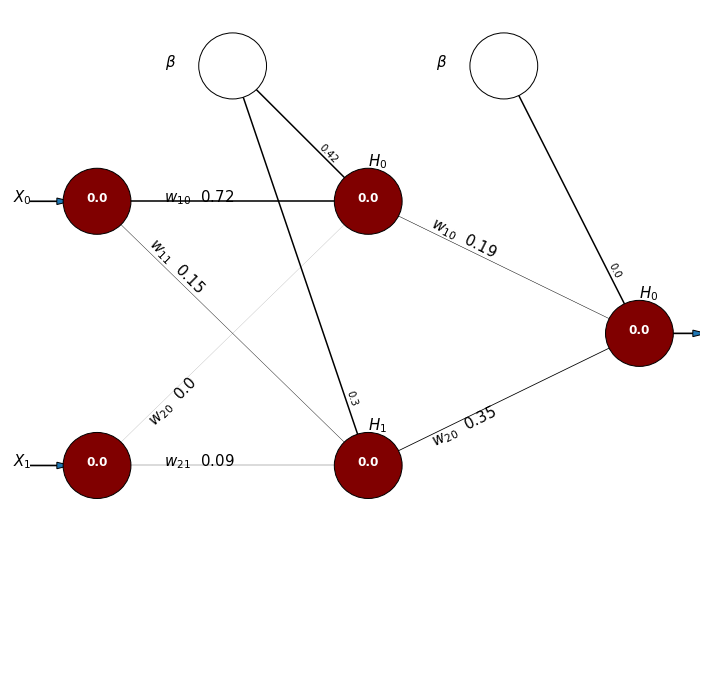

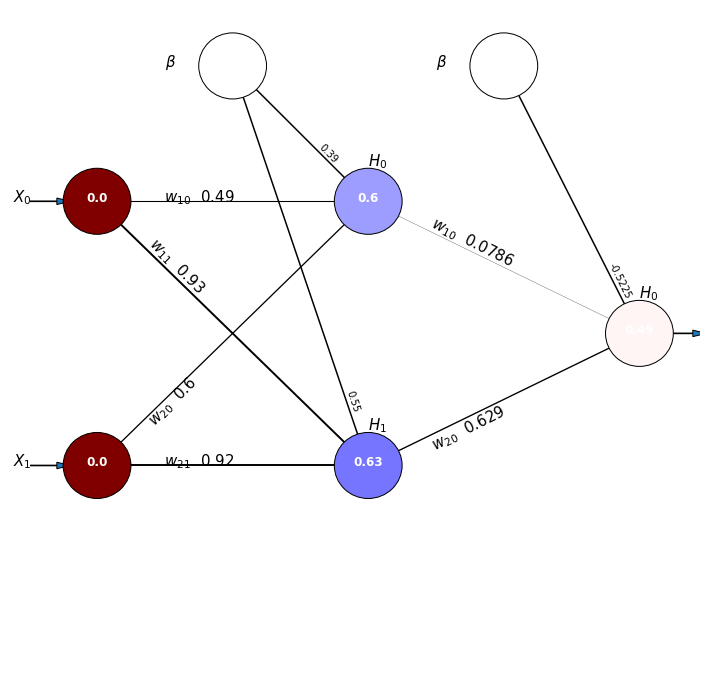

In [317]:
Ann.draw_neural_net()

In [ ]:
array([[0.603],
       [0.574]])